In [1]:
#Import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as tkr

In [2]:
#get data from saved pickle
df = pd.read_pickle('./cleaned-data.pkl')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32562 entries, kzwfHumJyYc to K10YIAokjvE
Data columns (total 16 columns):
trending_date             32562 non-null datetime64[ns]
title                     32562 non-null object
channel_title             32562 non-null object
category_id               32562 non-null category
publish_time              32562 non-null datetime64[ns, UTC]
tags                      32562 non-null object
views                     32562 non-null int64
likes                     32562 non-null int64
dislikes                  32562 non-null int64
comment_count             32562 non-null int64
thumbnail_link            32562 non-null object
comments_disabled         32562 non-null bool
ratings_disabled          32562 non-null bool
video_error_or_removed    32562 non-null bool
description               32562 non-null object
publish_day               32562 non-null object
dtypes: bool(3), category(1), datetime64[ns, UTC](1), datetime64[ns](1), int64(4), object(6)
memory

In [3]:
def bootstrap_replicate(data, func):
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)
def diff_func(data1, data2, func):
    bs_1 = bootstrap_replicate(data1, func)
    bs_2 = bootstrap_replicate(data2, func)
    return bs_1 - bs_2

In [4]:
data_10 = df[df.category_id==10]
data_20 = df[df.category_id==20]
data_30 = df[df.category_id==30]
diff_perm = [diff_func(data_20.views, data_10.views, np.mean) for i in range(10000)]
actual_diff = np.mean(data_20.views) - np.mean(data_10.views)
print(np.percentile(diff_perm,[2.5,97.5]))
print(actual_diff)

[  97702.67188116 2145422.55849617]
1073268.5711444435


/Users/nikhilsimha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


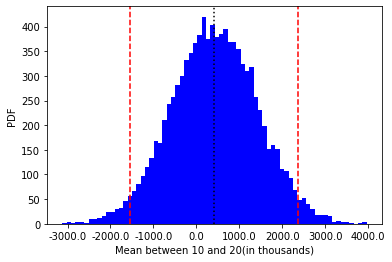

In [18]:
def func(x, pos):
    return x/1000
def plot(diff_perm, actual_diff, first, second):
    x_format = tkr.FuncFormatter(func)
    plt.cla()
    fig1 = plt.figure(1)
    ax = fig1.add_subplot(1,1,1)

    _ = ax.hist(diff_perm, bins=70, color='blue')
    _ = ax.axvline(np.percentile(diff_perm,[2.5]), color='red', linestyle='--')
    _ = ax.axvline(np.percentile(diff_perm,[97.5]), color='red', linestyle='--')
    _ = ax.axvline(actual_diff, color='black', linestyle=':')
    text = 'Mean between %s and %s(in thousands)' % (first, second)
    _ = ax.set_xlabel(text)
    _ = ax.set_ylabel('PDF')
    ax.xaxis.set_major_formatter(x_format)
    plt.show()
    
plot(diff_perm, actual_diff, '10', '20')

[-1582461.43159091  2351499.55295455]
414415.81818181835


/Users/nikhilsimha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


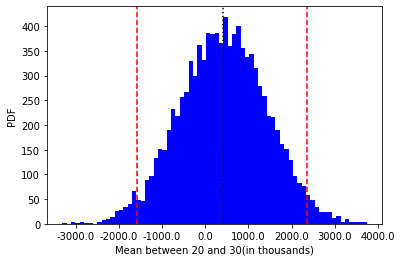

In [19]:
diff_perm = [diff_func(data_20.views, data_30.views, np.mean) for i in range(10000)]
actual_diff = np.mean(data_20.views) - np.mean(data_30.views)
print(np.percentile(diff_perm,[2.5,97.5]))
print(actual_diff)
plot(diff_perm, actual_diff, '20','30')

In [7]:
a = pd.to_datetime(df.publish_time.dt.date)
diff = df.trending_date - a
b = diff.dt.days

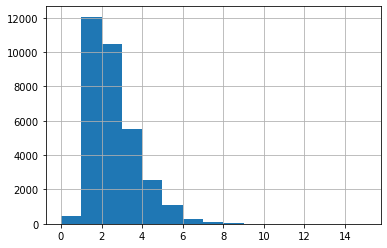

In [8]:
c = b[b<=15]
c.hist(bins=15)
plt.show()

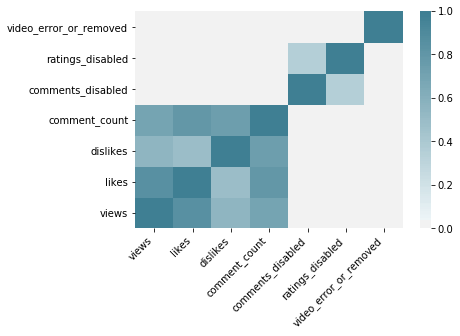

In [9]:
df1 = df[['category_id','views','likes','dislikes','comment_count','comments_disabled',
         'ratings_disabled','video_error_or_removed']]

ax = sns.heatmap(df1.corr(), #annot=True,  linewidths=.5, fmt= '.1f', square=True,
            cmap=sns.diverging_palette(20, 220, n=200),
           vmin=0, vmax=1, center=0)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim([0,7])
plt.show()